In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


23:00:15 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=986027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=78547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


23:00:16 INFO      Starting 3ML!                                                                     ]8;id=827847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=453472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=37774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=47048;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=809607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=876668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=321551;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=465577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

23:00:17 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=866306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=495699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=716961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=852935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=565408;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=142234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

23:00:17 WARNING   No fermitools installed                                              ]8;id=617958;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=91163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 333.28it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 34.26it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 117.08it/s]   

Yourlib init successfully!!!


,result,unit
parameter,,
J1837M0654u.spectrum.main.Powerlaw.K,(1.33 +/- 0.06) x 10^-21,1 / (keV s cm2)
J1837M0654u.spectrum.main.Powerlaw.index,-2.857 -0.035 +0.04,
J1839M0548u.spectrum.main.Powerlaw.K,(4.4 +/- 0.4) x 10^-22,1 / (keV s cm2)
J1839M0548u.spectrum.main.Powerlaw.index,-2.69 +/- 0.06,
J1841M0519.spectrum.main.Powerlaw.K,(1.21 +/- 0.06) x 10^-21,1 / (keV s cm2)
J1841M0519.spectrum.main.Powerlaw.index,-2.81 +/- 0.04,
J1843M0335u.spectrum.main.Powerlaw.K,(7.8 +/- 0.4) x 10^-22,1 / (keV s cm2)
J1843M0335u.spectrum.main.Powerlaw.index,-2.546 +/- 0.034,
J1848M0153u.spectrum.main.Powerlaw.K,(5.5 +/- 0.4) x 10^-22,1 / (keV s cm2)


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

00:48:23 INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=414397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=215392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=530243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=548164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=37478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=104624;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=90061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=998750;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=655278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=147676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=958975;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=844262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=447453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=663229;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=356042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=249372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=677881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=35655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=422071;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=241942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1848M0153u           ]8;id=597460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=445006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=485331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=29710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=229904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=534797;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=600252;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=398980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=213094;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=843476;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=991065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=216736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=691284;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=445672;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=493634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=286944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=572724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=432835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=777731;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=159872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1858P0330            ]8;id=960125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=109533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=525006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=641817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=513942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=284283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.359                      ]8;id=751808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=950173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(280.1953125, 1.0072042482155723)


<Figure size 640x480 with 0 Axes>

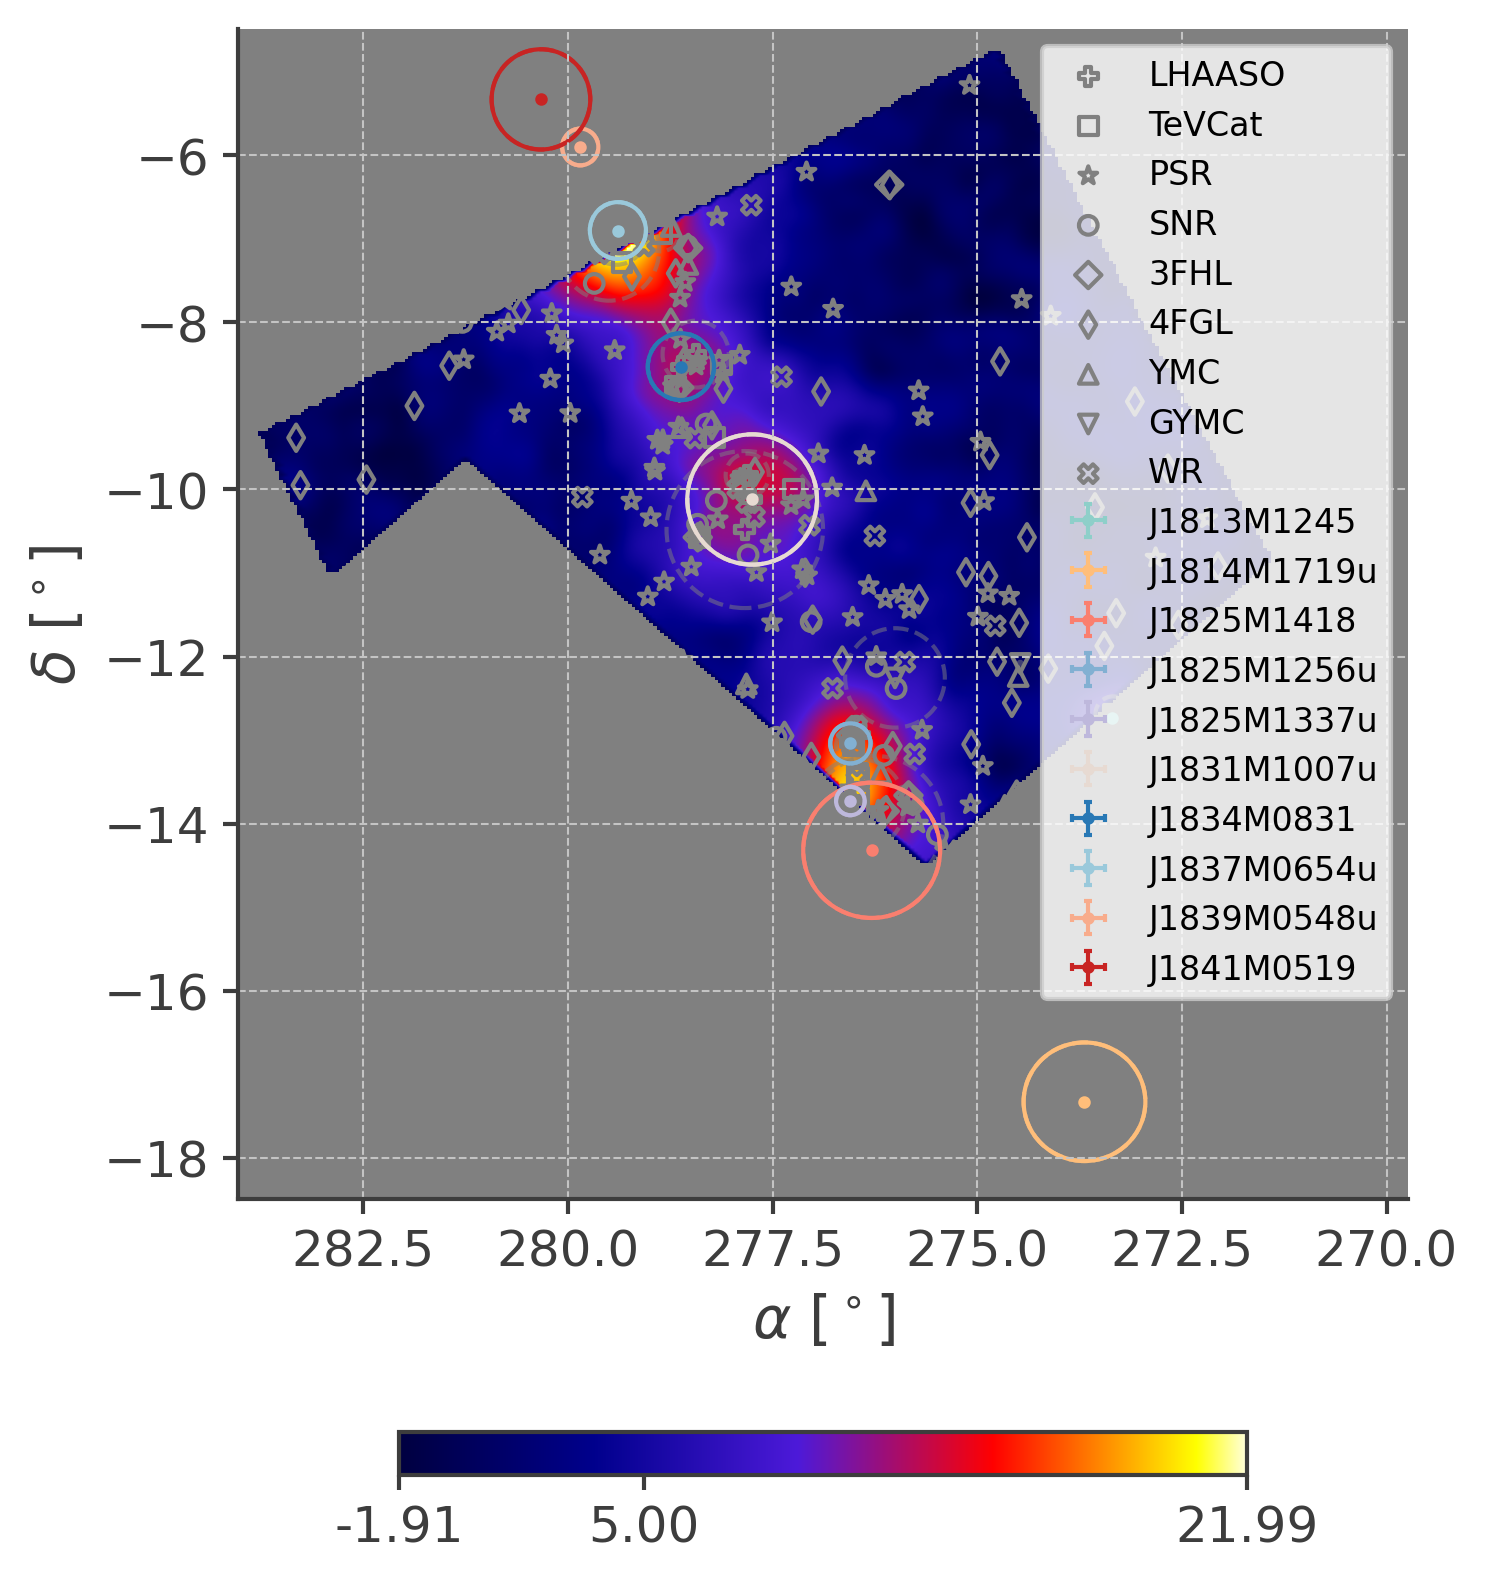

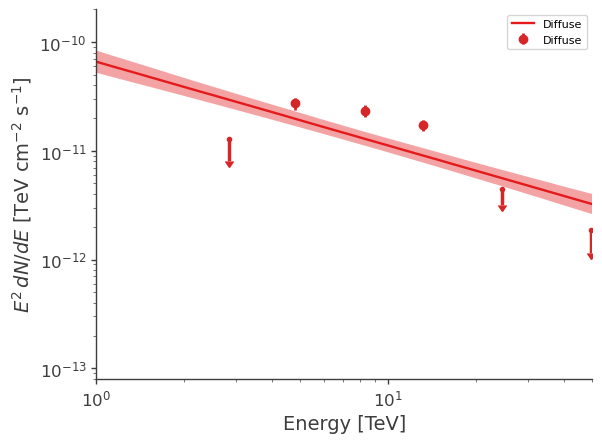

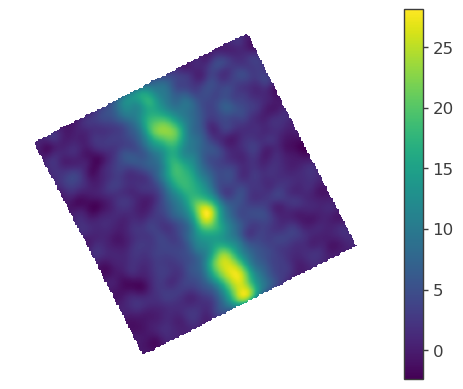

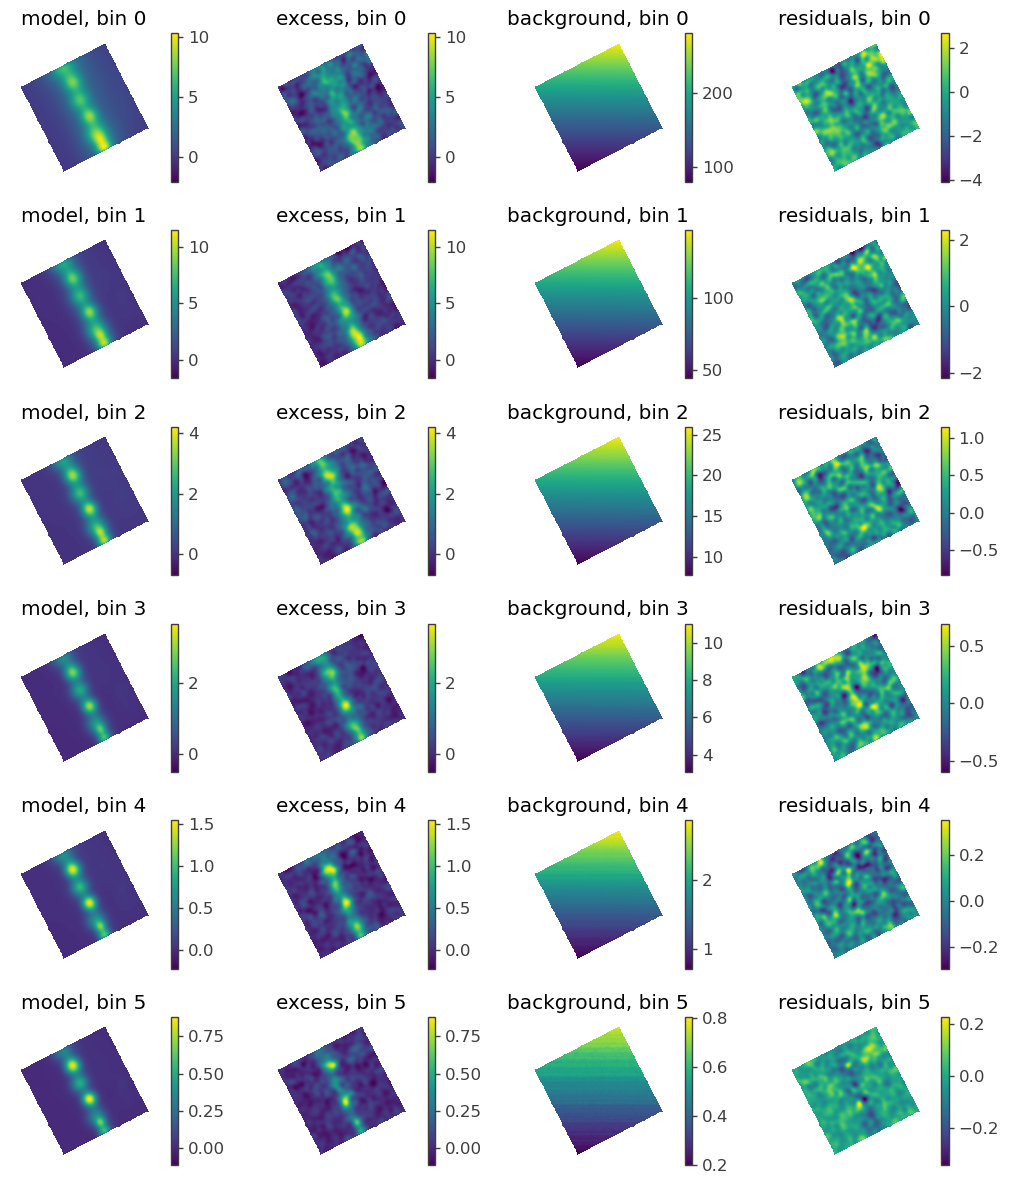

<Figure size 640x480 with 0 Axes>

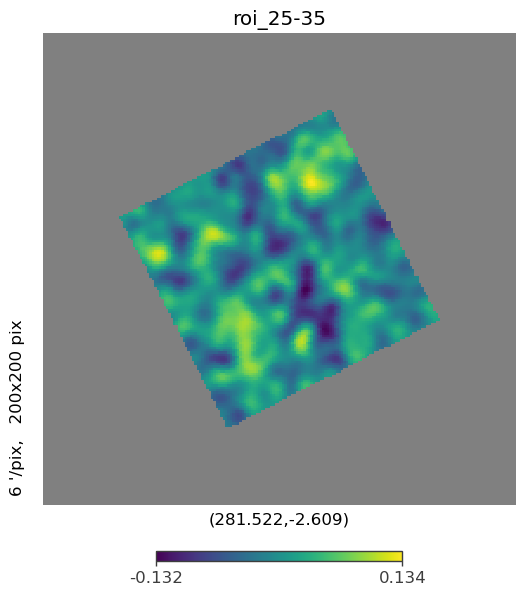

LHAASO:  1 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  2 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  3 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  4 279.31 -6.86 1LHAASO J1837-0654u   0.33
LHAASO:  5 279.79 -5.81  1LHAASO J1839-0548u  0.22
LHAASO:  6 279.85 -5.9  1LHAASO J1839-0548u   0.22
LHAASO:  7 280.33 -5.33 1LHAASO J1841-0519  0.6
LHAASO:  8 280.21 -5.23 1LHAASO J1841-0519   0.62
LHAASO:  9 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  10 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  11 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  12 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  13 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  14 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  15 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  16 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  17 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  18 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  19 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  20 284.38 2.06  1WCDA J1857+0203u  

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.13 +/- 0.32) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1564.451309
total,1564.451309


Values of statistical measures:

,statistical measures
AIC,3130.902639
BIC,3141.018875


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.11 +/- 0.28) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1544.033828
total,1544.033828


Values of statistical measures:

,statistical measures
AIC,3090.067678
BIC,3100.183913


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.7 +/- 0.4) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1512.117631
total,1512.117631


Values of statistical measures:

,statistical measures
AIC,3026.235284
BIC,3036.351519


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.22 +/- 0.35) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1468.440855
total,1468.440855


Values of statistical measures:

,statistical measures
AIC,2938.881733
BIC,2948.997968


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(3.1 +/- 0.4) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1316.981841
total,1316.981841


Values of statistical measures:

,statistical measures
AIC,2635.963704
BIC,2646.079939


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5 +/- 4) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1371.534244
total,1371.534244


Values of statistical measures:

,statistical measures
AIC,2745.068509
BIC,2755.184745



100%|██████████| 6/6 [01:30<00:00, 15.12s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



00:51:19 INFO      Region of Interest:                                                                   ]8;id=208104;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=517780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=524680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=396780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (286.095, 6.287), model radius: 7.500 ]8;id=320484;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=286257;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 7.000 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=171518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=834807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=412204;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=531037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=609760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=932897;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 90 x 90 px                                                             ]8;id=774676;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=943894;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=984646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=778977;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=736079;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=626084;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=540615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=263313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=718334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=126382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=695811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=953111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=1453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=335550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=420373;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=639058;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=493899;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=84454;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=523543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=908668;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=809456;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=537905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,9.849485e+06,9.777575e+06,1.007355,30462,99.869387
1,1,1024,RING,5.175322e+06,5.094172e+06,1.015930,30462,99.869387
2,2,1024,RING,9.182871e+05,8.884714e+05,1.033558,30462,99.869387
3,3,1024,RING,3.969280e+05,3.766242e+05,1.053910,30462,99.869387
4,4,1024,RING,1.072815e+05,9.892997e+04,1.084418,30462,99.869387
5,5,1024,RING,2.961811e+04,2.627849e+04,1.127086,30462,99.869387


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=119109;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=58131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=552762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=628885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=722137;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=254191;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=337422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=915775;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=539208;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=927893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=745165;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=670666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

00:51:20 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=166404;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=241629;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

00:51:21 INFO      J1850M0004u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=317895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=286253;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=608843;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=739385;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=5.30e-13 kb=(5.30e-15, 1.17e-12) index=-2.49 indexb=(-2.89,-2.09)                             

         INFO      Mor:                                                                                ]8;id=120332;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=909646;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.46 sb=(0.36,0.56) fitrange=0.40                                                         

         INFO      J1852P0050u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=198706;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=219109;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=920764;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=41561;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.67e-13 kb=(4.67e-15, 1.87e-12) index=-2.74 indexb=(-3.34,-2.14)                             

         INFO      Mor:                                                                                ]8;id=521920;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=820011;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.64 sb=(0.29,0.99) fitrange=1.00                                                         

         INFO      J1857P0245 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=876923;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=86609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=756539;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=192829;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.04e-13 kb=(4.04e-15, 1.54e-12) index=-2.93 indexb=(-3.63,-2.23)                             

         INFO      Mor:                                                                                ]8;id=326111;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=850824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.24 sb=(0.04,0.44) fitrange=0.55                                                         

         INFO      J1857P0203u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=529236;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=256683;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=745108;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=762901;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.68e-13 kb=(1.68e-15, 1.03e-12) index=-2.46 indexb=(-3.56,-1.36)                             

         INFO      Mor:                                                                                ]8;id=846067;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=205014;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.19 sb=(0.04,0.34) fitrange=0.55                                                         

         INFO      J1858P0330 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=381431;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=633915;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=154635;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=649110;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=2.84e-13 kb=(2.84e-15, 1.54e-12) index=-2.63 indexb=(-3.63,-1.63)                             

         INFO      Mor:                                                                                ]8;id=547875;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=894261;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.52 sb=(0.12,0.92) fitrange=1.70                                                         

         INFO      J1902P0648 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=662059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=440831;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=784499;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=992388;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.50e-14 kb=(1.00e-15, 3.05e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=898606;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=903824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J1906P0712 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=218825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=306530;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=252582;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=53065;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.01e-13 kb=(1.01e-15, 6.01e-13) index=-2.72 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=907812;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=34402;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.21 sb=(0.00,0.46) fitrange=1.05                                                         

         INFO      J1907P0826 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=941396;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=975613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=327651;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=613189;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.34e-13 kb=(1.34e-15, 7.14e-13) index=-2.62 indexb=(-4.00,-1.22)                             

         INFO      Mor:                                                                                ]8;id=827458;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=69001;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.43 sb=(0.03,0.83) fitrange=1.55                                                         

         INFO      J1908P0615u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=696281;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=661348;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=421481;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=441929;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=7.97e-13 kb=(7.97e-15, 1.88e-12) index=-2.42 indexb=(-2.72,-2.12)                             

         INFO      Mor:                                                                                ]8;id=573598;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=684220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.43 sb=(0.33,0.53) fitrange=0.25                                                         

         INFO      J1910P0516 in roi: 7 sf:True pf:True kf:False indexf:False                          ]8;id=110367;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=608118;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=127199;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=797810;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=8.60e-14 kb=(1.00e-15, 6.66e-13) index=-2.54 indexb=(-4.00,-1.04)                             

         INFO      Mor:                                                                                ]8;id=748403;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=596972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.29 sb=(0.00,0.74) fitrange=1.90                                                         

         INFO      J1912P1014u in roi: 7 sf:True pf:True kf:False indexf:False                         ]8;id=193037;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=774647;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=329991;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=883578;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=3.07e-13 kb=(3.07e-15, 7.87e-13) index=-2.68 indexb=(-3.28,-2.08)                             

         INFO      Mor:                                                                                ]8;id=992469;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=870320;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.36 sb=(0.21,0.51) fitrange=0.40                                                         

         INFO      J1914P1150u in model_radius: 7.5 sf:True pf:True kf:True indexf:True                ]8;id=160731;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=456726;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=346550;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=311529;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.09e-13 kb=(1.09e-15, 3.49e-13) index=-2.34 indexb=(-3.04,-1.64)                             

         INFO      Mor:                                                                                ]8;id=645116;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=36008;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.33 sb=(0.13,0.53) fitrange=0.70                                                         

         INFO      Set diffuse range: [31, 47] [-8, 8]                                                ]8;id=369495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=769549;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1159\1159]8;;\

         INFO      ra dec coner:                                                                      ]8;id=824400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=216415;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1160\1160]8;;\

         INFO      (289.1237501126153, -5.346118102161174)                                            ]8;id=372346;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=774165;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1161\1161]8;;\

         INFO      (296.5291083447021, 8.671403139733373)                                             ]8;id=844259;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=819532;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1162\1162]8;;\

         INFO      (282.018324697397, 16.12231323547236)                                              ]8;id=638204;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=34876;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1163\1163]8;;\

         INFO      (274.85999095399006, 1.9340616592345006)                                           ]8;id=23734;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=844584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1164\1164]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=849676;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=296260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1203\1203]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.096060119544788e-05                                                 ]8;id=324434;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=369553;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1204\1204]8;;\
                  ratio: 0.0864962107600871                                                                        

         INFO      set K to: 1.5508411453547317e-12                                                   ]8;id=678215;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=33436;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1205\1205]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case11_dust_bkg_template.fits           ]8;id=341546;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=883399;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1232\1232]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  12
Particle sources   0

Free parameters (20):
--------------------

                                         value min_value max_value   
J1857P0245.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1857P0245.spectrum.main.Powerlaw.index  -2.93     -3.63     -2.23   
J1857P0203u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index -2.46     -3.56     -1.36   
J1858P0330.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index  -2.63     -3.63     -1.63   
J1902P0648.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1902P0648.spectrum.main.Powerlaw.index  -2.39      -4.0      -1.0   
J1906P0712.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index  -2.72      -4.0     -1.22   
J1907P0826.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index  -2.62      -4.0     -1.22   
J1908P0615u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index -2.42     -2.72     -2.12   
J1910P0516.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index  -2.54      -4.0     -1.04   
J1912P1014u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index -2.68     -3.28     -2.08   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1857P0245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1857P0245.spectrum.main.Powerlaw.index                   
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1902P0648.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1902P0648.spectrum.main.Powerlaw.index                   
J1906P0712.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1906P0712.spectrum.main.Powerlaw.index                   
J1907P0826.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1907P0826.spectrum.main.Powerlaw.index                   
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (57):
---------------------

                                                                                      value   
J1850M0004u.Gaussian_on_sphere.lon0                                                  282.74  \
J1850M0004u.Gaussian_on_sphere.lat0                                                   -0.07   
J1850M0004u.Gaussian_on_sphere.sigma                                                   0.46   
J1850M0004u.spectrum.main.Powerlaw.K                                                    0.0   
J1850M0004u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1850M0004u.spectrum.main.Powerlaw.index                                              -2.49   
J1852P0050u.Gaussian_on_sphere.lon0                                                  283.73   
J1852P0050u.Gaussian_on_sphere.lat0                                                     1.4   
J1852P0050u.Gaussian_on_sphere.sigma                                                   0.64   
J1852P0050u.spectrum.main.Powerlaw.K                                                    0.0   
J1852P0050u.spectrum.main.Powerlaw.piv

00:51:22 INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=191325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=319861;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=944675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=555441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1852P0050u           ]8;id=712791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=458255;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=282508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=822797;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=925881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=120474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=751407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=524809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=365526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=637591;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=751813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1858P0330            ]8;id=492818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=639181;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=78418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=346879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=353917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=769667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=368809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501053;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1907P0826            ]8;id=166846;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=544210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=221972;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=245027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=496087;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=641091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=728917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=284134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=928856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=60709;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=437207;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=580589;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=58879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=591866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=961152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=164346;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1914P1150u           ]8;id=644156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=382093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=553217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=165577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=602918;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=986804;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.521                       ]8;id=415912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=527545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=943990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=864106;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=49380;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=447737;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1857P0245.spectrum.main.Powerlaw.K,(3.48 -0.18 +0.19) x 10^-22,1 / (keV s cm2)
J1857P0245.spectrum.main.Powerlaw.index,-2.80 +/- 0.05,
J1857P0203u.spectrum.main.Powerlaw.K,(1.31 -0.18 +0.21) x 10^-22,1 / (keV s cm2)
J1857P0203u.spectrum.main.Powerlaw.index,-2.40 +/- 0.09,
J1858P0330.spectrum.main.Powerlaw.K,(2.14 -0.26 +0.30) x 10^-22,1 / (keV s cm2)
J1858P0330.spectrum.main.Powerlaw.index,-2.61 +/- 0.09,
J1902P0648.spectrum.main.Powerlaw.K,(3.7 -1.0 +1.4) x 10^-23,1 / (keV s cm2)
J1902P0648.spectrum.main.Powerlaw.index,-2.29 +/- 0.20,
J1906P0712.spectrum.main.Powerlaw.K,(8.0 -1.2 +1.4) x 10^-23,1 / (keV s cm2)


Correlation matrix:

1.00,-0.42,-0.34,0.25,-0.30,0.18,-0.03,0.03,0.01,0.01,0.03,-0.01,0.04,-0.03,-0.00,0.01,0.03,-0.01,-0.06,0.03
-0.42,1.00,0.17,-0.19,0.16,-0.20,0.03,-0.03,-0.01,0.01,-0.01,0.03,-0.02,0.03,-0.01,0.01,-0.01,0.03,0.02,-0.11
-0.34,0.17,1.00,-0.84,0.15,-0.06,0.15,-0.15,0.02,-0.00,0.12,-0.06,0.05,-0.02,0.02,-0.00,0.09,-0.03,-0.23,0.10
0.25,-0.19,-0.84,1.00,-0.11,0.07,-0.12,0.12,-0.01,0.00,-0.08,0.06,-0.04,0.03,-0.01,0.00,-0.07,0.04,0.17,-0.13
-0.30,0.16,0.15,-0.11,1.00,-0.61,0.24,-0.24,0.09,-0.04,0.23,-0.10,0.10,-0.04,0.04,-0.03,0.21,-0.09,-0.51,0.23
0.18,-0.20,-0.06,0.07,-0.61,1.00,-0.12,0.13,-0.05,0.05,-0.10,0.11,-0.05,0.06,-0.02,0.02,-0.11,0.10,0.26,-0.35
-0.03,0.03,0.15,-0.12,0.24,-0.12,1.00,-0.91,-0.09,0.13,0.29,-0.16,0.03,0.02,0.03,-0.01,0.13,-0.04,-0.40,0.18
0.03,-0.03,-0.15,0.12,-0.24,0.13,-0.91,1.00,0.09,-0.13,-0.31,0.18,-0.02,-0.02,-0.03,0.02,-0.12,0.05,0.39,-0.21
0.01,-0.01,0.02,-0.01,0.09,-0.05,-0.09,0.09,1.00,-0.63,-0.09,0.07,-0.25,0.18,0.03,-0.01,0.07,-0.04,-0.16,0.08
0.01,0.01,-0.00,0.00,-0.04,0.05,0.13,-0.13,-0.63,1.00,0.06,-0.05,0.19,-0.20,-0.01,0.00,-0.03,0.05,0.07,-0.14
0.03,-0.01,0.12,-0.08,0.23,-0.10,0.29,-0.31,-0.09,0.06,1.00,-0.57,0.14,-0.08,0.01,0.01,0.14,-0.02,-0.49,0.22


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,9184.555908
total,9184.555908


Values of statistical measures:

,statistical measures
AIC,18409.116412
BIC,18611.431710


,value,negative_error,positive_error,error,unit
J1857P0245.spectrum.main.Powerlaw.K,3.482152e-22,-1.730358e-23,1.863547e-23,1.796953e-23,1 / (keV s cm2)
J1857P0245.spectrum.main.Powerlaw.index,-2.798775e+00,-4.449003e-02,4.702436e-02,4.575719e-02,
J1857P0203u.spectrum.main.Powerlaw.K,1.305066e-22,-1.828956e-23,2.036131e-23,1.932543e-23,1 / (keV s cm2)
J1857P0203u.spectrum.main.Powerlaw.index,-2.402248e+00,-8.666833e-02,9.130365e-02,8.898599e-02,
J1858P0330.spectrum.main.Powerlaw.K,2.139747e-22,-2.583586e-23,2.975014e-23,2.779300e-23,1 / (keV s cm2)
J1858P0330.spectrum.main.Powerlaw.index,-2.610043e+00,-9.403661e-02,9.555120e-02,9.479390e-02,
J1902P0648.spectrum.main.Powerlaw.K,3.663647e-23,-1.046115e-23,1.461023e-23,1.253569e-23,1 / (keV s cm2)
J1902P0648.spectrum.main.Powerlaw.index,-2.294462e+00,-2.034790e-01,2.017464e-01,2.026127e-01,
J1906P0712.spectrum.main.Powerlaw.K,7.984993e-23,-1.177201e-23,1.419127e-23,1.298164e-23,1 / (keV s cm2)
J1906P0712.spectrum.main.Powerlaw.index,-2.589238e+00,-1.255846e-01,1.256281e-01,1.256063e-01,


In [18]:
%matplotlib inline
#####   Data Initialize
# activate_warnings()

# maptree = "../../data/gcd_new.root"
# response="../../data/WCDA_DR_psf.root"

# maptree =  "../../data/hsc2healpix_20210305_20220930.root"
# response = "../../data/WCDA_DR2.root"

# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"


region_name="Diffuse_WCDA_case11"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')


nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix
pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(range(20,360,10)): # #!!!!!!!!!!!!!!!!!!!365  
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 7
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="exact"

    my.settransWCDA(WCDA, ra1, dec1)

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=20, rtindex=10, rtp=5,  detector="WCDA", roi=roi, pf=True, sf=True, kf=False, indexf=False,  mkf=True, mindexf=True, setdeltabypar=True) #indexb=(-4,-1),

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-18, 1e-10), indexb=(-4.5, -0.5), index=-2.5, setdeltabypar=True
                ) #Kn=1 , K=1e-12
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT", donwtlimit=True, ifgeterror=True) #
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, iffixtans=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:   pass
    #     continue

roi_15-25


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_25-35


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_35-45


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_45-55


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_55-65


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_65-75


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_75-85


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_85-95
roi_95-105
roi_105-115
roi_115-125
roi_125-135
roi_135-145
roi_145-155
roi_155-165
roi_165-175
roi_175-185
roi_185-195
roi_195-205
roi_205-215
roi_215-225
roi_225-235


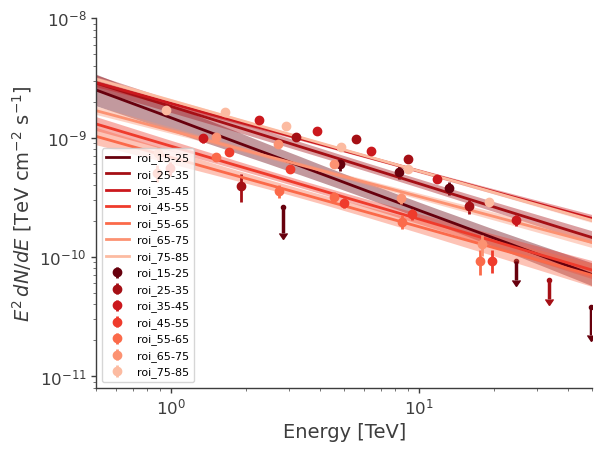

In [12]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files): #[:7]
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(20,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/Diffuse_WCDA_case10/resultsall.npy")
        dkf = resultfile[9]
    if i < 7:
        # try:
        plot_spectra(
            resultsss,
            sources_to_use=["Diffuse"],
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit=f"TeV/(s cm2)", #*
            subplot=ax,
            plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
            )
        try:
            data = my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
            my.spec2naima(f"./spec_{name}.txt", data)
        except:
            pass
        # except Exception as e:
        #     print(f"Error: {e}")
        #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

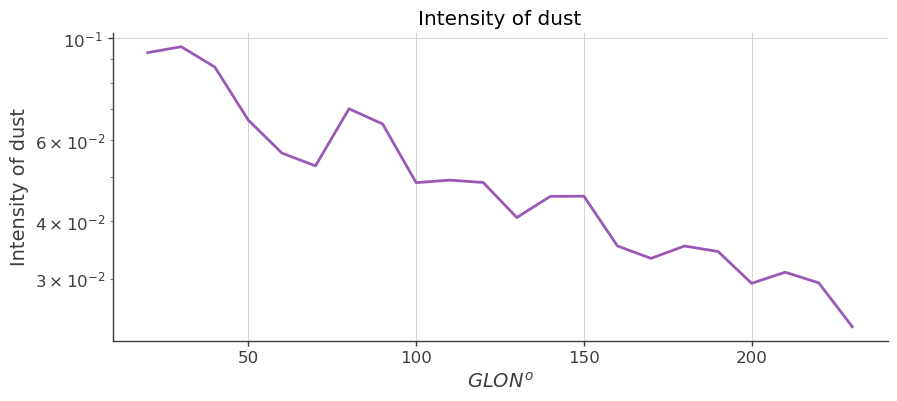

In [13]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

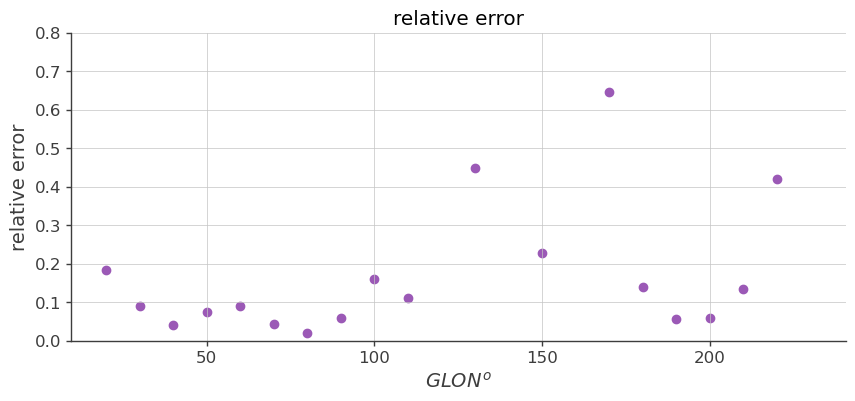

In [14]:
plt.figure(figsize=(10,4)) #
plt.scatter(gc, (np.array(de)*1e9)/(np.array(dk)*1e9), marker="o") #np.array(den)*1e9, np.array(dep)*1e9
# plt.yscale("log")
plt.title("relative error")
plt.ylim(0, 0.8)
plt.ylabel("relative error")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

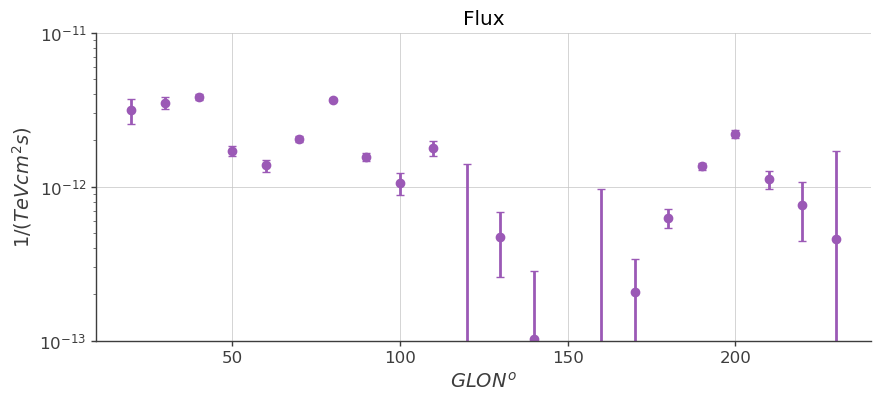

In [15]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-13, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

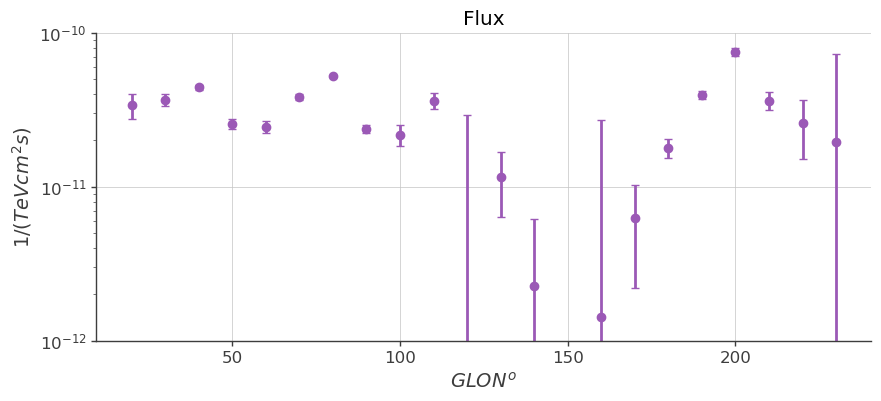

In [16]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-12, 1e-10)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

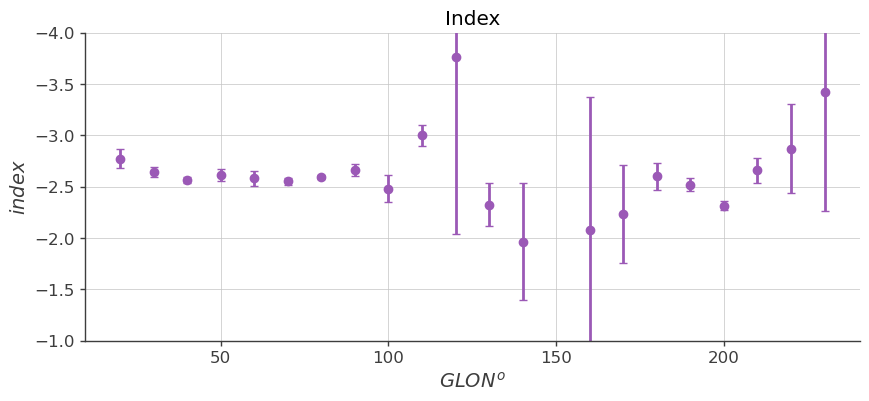

In [17]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

In [ ]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)